In [11]:
import numpy as np
import random
import collections 
import matplotlib.pyplot as plt

In [12]:
#awards rewards based on winnings 
def check_win(configuration):
    wins = [[0,1,2],[3,4,5],[6,7,8],
            [0,3,6],[1,4,7],[2,5,8],
            [0,4,8],[2,4,6]]
    
    for i in range(8):
        if (configuration[wins[i][0]] == 1 and
            configuration[wins[i][1]] == 1 and
            configuration[wins[i][2]] == 1):
            return 1
    
    for i in range(8):
        if (configuration[wins[i][0]] == 2 and
            configuration[wins[i][1]] == 2 and
            configuration[wins[i][2]] == 2 ):
            return -1
    return 0

In [13]:
#converts the board into an integer to store the values
def state_to_key(state):
    key = 0
    for i, elem in enumerate(state):
        key += int(elem * 3**(i))
    return key

In [14]:
#returns the next and reward given a state and action
def make_move(state,action,player):
    state[action]=player
    reward=check_win(state)
    return state,reward

In [15]:
# for the mc agent to selects action based on the Q valu
def mc_select_action(state,act_choices,q):
    act_chosen=-1
    q_val=-1000
    for act in act_choices:
        if (q[state][act]!=0 and q[state][act]>q_val):
            q_val=pi[state][act]
            act_chosen=act
    if (act_chosen<0):
        act_chosen = random.choice(act_choices)
        
    return act_chosen

In [16]:
#agent is playing based on the trained q values
def play_using_q(q):
    global win_list, loss_list, tie_list
    wins = 0 
    loss = 0 
    tie = 0 

    for i in range(1000):
        state = np.zeros(9)
        action_choices = [0,1,2,3,4,5,6,7,8]
        player=random.choice([0,1])
        reward=0
        while(len(action_choices)>0 and reward==0):
            player=player%2+1
            if (player==1):
                action = mc_select_action(state_to_key(state),action_choices,q) 
            else:
                action = random.choice(action_choices) 
            action_choices.remove(action)   
            new_state,reward=make_move(state,action,player)  
            
        if (reward==1):
            wins+=1
        elif (reward==-1):
            loss+=1
        else:
            tie+=1
       
    win_list.append(wins)
    loss_list.append(loss)
    tie_list.append(tie)
    print("    Win : ", wins, "Loss : ", loss, "Ties : ", tie)

In [17]:
def monte_carlo_control(pi,Q,Counts):
    global x_axis
    episode=[]
    for i in range(1000001):
        state = np.zeros(9)
        action_choices = [0,1,2,3,4,5,6,7,8]
        player=random.choice([0,1])
        #player= 0
        reward=0
        episode=[]
        rewards=[]
        while(len(action_choices)>0 and reward==0):
            player=player%2+1
            state_key=state_to_key(state)
            action =  random.choice(action_choices)
            action_choices.remove(action)   
            new_state,reward=make_move(state,action,player) 
            episode.append((state_key,action))
            rewards.append(reward)
            state=new_state
            
        G=0
        for j,(s,a) in enumerate(reversed(episode)):
            ind_frw=len(rewards)-j-1
            reward=rewards[ind_frw]
            G+=reward
            if (s,a) not in episode[:ind_frw]:
                Counts[s][a] += 1
                Q[s][a] += (G-Q[s][a])/Counts[s][a]

        if (i>0 and (i%100000==0 or i==5 or i==1000 or i==5000)):
            print("After ",i," episodes: ")
            x_axis.append(i)
            play_using_q(Q)

In [18]:
pi = np.zeros([3**9,9])
Counts = np.zeros([3**9,9])
Q = np.zeros([3**9,9])
win_list=[]
loss_list=[]
tie_list=[]
x_axis=[]
myQ=monte_carlo_control(pi,Q,Counts)

After  5  episodes: 
    Win :  451 Loss :  406 Ties :  143
After  1000  episodes: 
    Win :  461 Loss :  418 Ties :  121
After  5000  episodes: 
    Win :  583 Loss :  312 Ties :  105
After  100000  episodes: 
    Win :  811 Loss :  143 Ties :  46
After  200000  episodes: 
    Win :  769 Loss :  151 Ties :  80
After  300000  episodes: 
    Win :  814 Loss :  124 Ties :  62
After  400000  episodes: 
    Win :  835 Loss :  126 Ties :  39
After  500000  episodes: 
    Win :  839 Loss :  119 Ties :  42
After  600000  episodes: 
    Win :  841 Loss :  100 Ties :  59
After  700000  episodes: 
    Win :  837 Loss :  112 Ties :  51
After  800000  episodes: 
    Win :  871 Loss :  92 Ties :  37
After  900000  episodes: 
    Win :  847 Loss :  101 Ties :  52
After  1000000  episodes: 
    Win :  867 Loss :  90 Ties :  43


[455, 421, 632, 674, 675, 745, 757, 795, 795, 780, 816, 762]
[441, 459, 301, 292, 241, 180, 191, 160, 152, 156, 147, 188]
[104, 120, 67, 34, 84, 75, 52, 45, 53, 64, 37, 50]
[5, 1000, 5000, 10000, 20000, 30000, 40000, 50000, 60000, 70000, 80000, 90000]


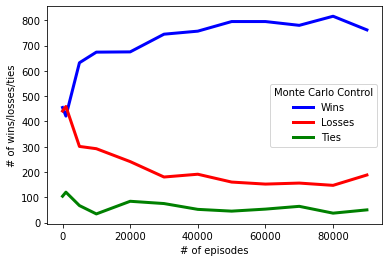

In [32]:
print(win_list)
print(loss_list)
print(tie_list)
print(x_axis)
plt.plot(x_axis,win_list,color='blue',linewidth=3,label='Wins')
plt.plot(x_axis,loss_list,color='red',linewidth=3,label='Losses')
plt.plot(x_axis,tie_list,color='green',linewidth=3,label='Ties')
plt.legend(title='Monte Carlo Control')
plt.xlabel("# of episodes")
plt.ylabel("# of wins/losses/ties")
plt.show()